In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
import cv2
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
dataset_dir = "OneDrive/Desktop/speed_sign/archive/"
os.listdir(dataset_dir)

['DATA', 'ignored', 'labels.csv', 'TEST']

In [3]:
labels_df = pd.read_csv(dataset_dir + r'labels.csv')
speedSigns_labels = labels_df[0:8]
print(speedSigns_labels)

   ClassId                  Name
0        0   Speed limit (5km/h)
1        1  Speed limit (15km/h)
2        2  Speed limit (30km/h)
3        3  Speed limit (40km/h)
4        4  Speed limit (50km/h)
5        5  Speed limit (60km/h)
6        6  Speed limit (70km/h)
7        7  speed limit (80km/h)


In [4]:
train_images_path = dataset_dir + r'DATA/'
train_images_folders = os.listdir(train_images_path)
print(train_images_folders)

['0', '1', '2', '3', '4', '5', '6', '7']


In [5]:
train_images_speed_folders = []
for classID in speedSigns_labels["ClassId"]:
    train_images_speed_folders.append(train_images_path +  str(classID))
print(train_images_speed_folders)
    

['OneDrive/Desktop/speed_sign/archive/DATA/0', 'OneDrive/Desktop/speed_sign/archive/DATA/1', 'OneDrive/Desktop/speed_sign/archive/DATA/2', 'OneDrive/Desktop/speed_sign/archive/DATA/3', 'OneDrive/Desktop/speed_sign/archive/DATA/4', 'OneDrive/Desktop/speed_sign/archive/DATA/5', 'OneDrive/Desktop/speed_sign/archive/DATA/6', 'OneDrive/Desktop/speed_sign/archive/DATA/7']


(128, 134, 3)
OneDrive/Desktop/speed_sign/archive/DATA/0/000_0001.png


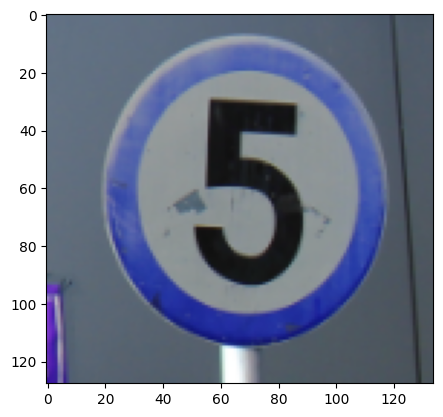

(62, 69, 3)
OneDrive/Desktop/speed_sign/archive/DATA/1/001_0001.png


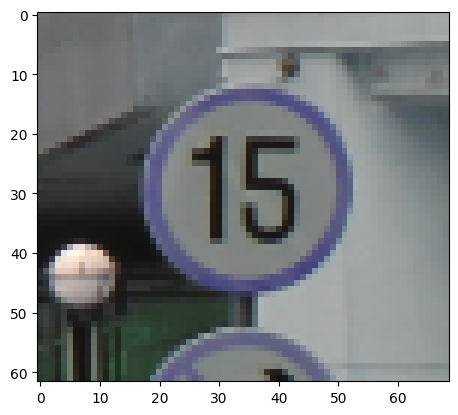

(82, 79, 3)
OneDrive/Desktop/speed_sign/archive/DATA/2/002_0001.png


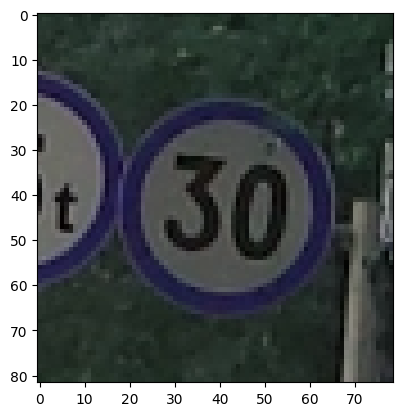

(76, 85, 3)
OneDrive/Desktop/speed_sign/archive/DATA/3/003_0001.png


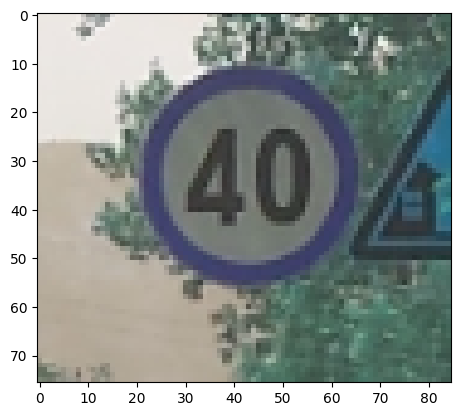

(101, 107, 3)
OneDrive/Desktop/speed_sign/archive/DATA/4/004_0001.png


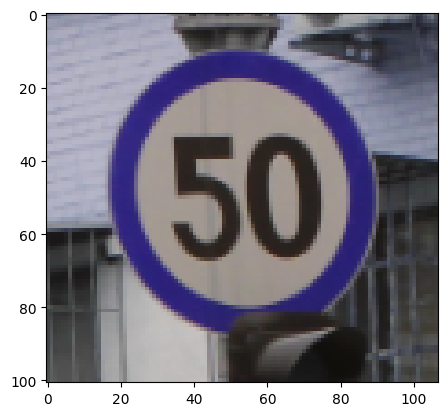

(131, 131, 3)
OneDrive/Desktop/speed_sign/archive/DATA/5/005_0001.png


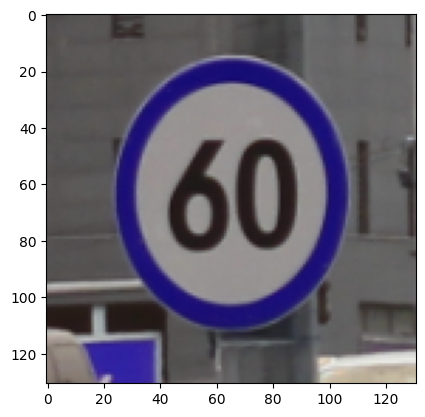

(119, 132, 3)
OneDrive/Desktop/speed_sign/archive/DATA/6/006_0001.png


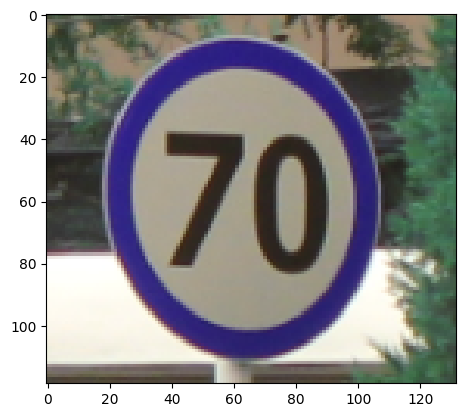

(101, 108, 3)
OneDrive/Desktop/speed_sign/archive/DATA/7/007_0001.png


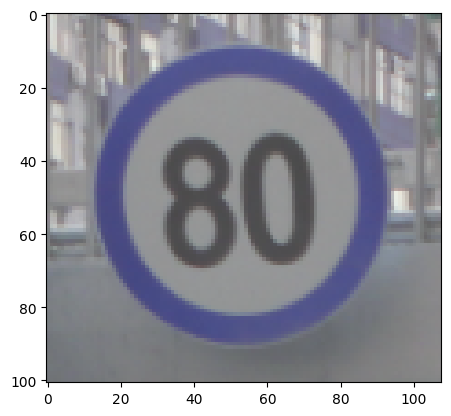

In [6]:
%matplotlib inline

for img_folder in train_images_speed_folders:
    img_list = os.listdir(img_folder)
    #print(img_list[0:3])
    img_sample = cv2.imread(img_folder + '/' + img_list[0])
    print(img_sample.shape)
    print(img_folder + '/' + img_list[0])
    plt.imshow(img_sample)
    plt.show()
    #break
    

In [7]:
from PIL import Image
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [54]:
train_data = image_dataset_from_directory(train_images_path,batch_size=32, label_mode='categorical',  validation_split = 0.2, subset='training', seed=123, image_size=(128,128))
val_data = image_dataset_from_directory(train_images_path,batch_size=32, label_mode='categorical',  validation_split = 0.2, subset='validation', seed=123, image_size=(128,128))

Found 1251 files belonging to 8 classes.
Using 1001 files for training.
Found 1251 files belonging to 8 classes.
Using 250 files for validation.


In [55]:
print(train_data.class_names)

['0', '1', '2', '3', '4', '5', '6', '7']


In [ ]:
for image, label in data:
    

In [63]:
del(model)
model = Sequential()
#model.add(Rescaling(scale=1./127.5, input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(8, activation='softmax'))

In [64]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
model.fit(train_data, validation_data=val_data, epochs=15)

Epoch 1/15
32/32 [==============================] - 2s 47ms/step - loss: 215.9320 - accuracy: 0.1489 - val_loss: 2.0794 - val_accuracy: 0.0680
Epoch 2/15
32/32 [==============================] - 2s 44ms/step - loss: 1.9802 - accuracy: 0.2248 - val_loss: 2.0394 - val_accuracy: 0.4120
Epoch 3/15
32/32 [==============================] - 2s 45ms/step - loss: 1.4297 - accuracy: 0.4895 - val_loss: 1.0762 - val_accuracy: 0.7600
Epoch 4/15
32/32 [==============================] - 1s 44ms/step - loss: 0.7068 - accuracy: 0.7642 - val_loss: 0.6382 - val_accuracy: 0.8720
Epoch 5/15
32/32 [==============================] - 2s 45ms/step - loss: 0.4099 - accuracy: 0.8691 - val_loss: 0.4644 - val_accuracy: 0.8960
Epoch 6/15
32/32 [==============================] - 1s 41ms/step - loss: 0.3135 - accuracy: 0.9041 - val_loss: 0.3341 - val_accuracy: 0.9280
Epoch 7/15
32/32 [==============================] - 2s 44ms/step - loss: 0.1902 - accuracy: 0.9371 - val_loss: 0.2597 - val_accuracy: 0.9520
Epoch 8/15


1/1 [==============================] - 0s 21ms/step


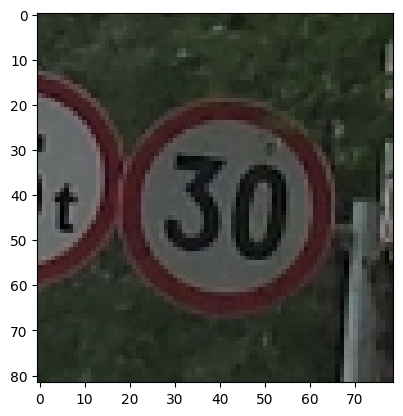

Speed limit is: 30


In [81]:
from tensorflow.keras.preprocessing import image

img_sample_path = 'OneDrive/Desktop/speed_sign/archive/DATA/2/002_1_0001.png'
img = image.load_img(img_sample_path, target_size=(128,128))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)

#img_arr = img_arr / 127.5
pred_lst = model.predict(img_arr)
prediction_ind = pred_lst.argmax()
#print(pred_lst.argmax())
speedList = [5, 15,30, 40, 50, 60, 70, 80]
img_sample = cv2.imread(img_sample_path, cv2.COLOR_BGR2RGB)
img_sample = cv2.cvtColor(img_sample, cv2.COLOR_BGR2RGB)
plt.imshow(img_sample)
plt.show()
print(f'Speed limit is: {speedList[prediction_ind]}' )

In [82]:
model.save('OneDrive/Desktop/speed_sign/speed_sign_model.h5')